# Обучение сети c несколькими параметрами

Параметры обучения: Vgs, Vds, L, W, Temp

In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
# !conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0

In [3]:
# !python -m pip install tensorflow

Загружаем свой датасет


In [4]:
df = pd.read_csv('mosfet.csv')

In [5]:
df.shape

(19440, 6)

In [6]:
df.describe()

,Vds,Vgs,L,W,T,Id
count,19440.000000,19440.000000,1.944000e+04,1.944000e+04,19440.00000,1.944000e+04
mean,1.625000,1.625000,5.333333e-07,5.333333e-07,25.00000,1.677931e-04
std,0.863035,0.863035,3.399434e-07,3.399434e-07,20.41294,2.057678e-04
min,0.250000,0.250000,2.000000e-07,2.000000e-07,0.00000,2.771718e-10
25%,0.937500,0.937500,2.000000e-07,2.000000e-07,0.00000,1.899052e-05
50%,1.625000,1.625000,4.000000e-07,4.000000e-07,25.00000,9.219217e-05
75%,2.312500,2.312500,1.000000e-06,1.000000e-06,50.00000,2.382717e-04
max,3.000000,3.000000,1.000000e-06,1.000000e-06,50.00000,1.182879e-03


In [ ]:
# df['Vds'].unique() 

In [ ]:
df['L'].unique() 

array([2.e-07, 5.e-07, 8.e-07])

In [ ]:
df['W'].unique() 

array([2.e-07, 5.e-07, 8.e-07])

In [ ]:
df['T'].unique() 

array([ 0., 25., 50.])

## Подготовка данных

Подготовим входные данные и заменим нули

In [ ]:
df[df['Id'] != 0.0]['Id'].min()

-6.287081180172834e-20

In [ ]:
df[df['Vgs'] != 0.0]['Vgs'].min()

0.2

In [ ]:
df[df['Vds'] != 0.0]['Vds'].min()

0.2

In [ ]:
REPLACE_ZERO_ID = 1e-15
REPLACE_ZERO_VGS = 1e-3
REPLACE_ZERO_VDS = 1e-3
# REPLACE_ZERO_T = 0.1
SHIFT_T = 30

In [ ]:
# df.loc[df["Id"] < 0, "Id"] = 0

In [ ]:
# df[df["Id"] < 0]

In [ ]:
# # Replace zeros
# # df[df["Id"] < 0] = 0
# df["Id"].replace({0:REPLACE_ZERO_ID}, inplace=True)
# df["Vgs"].replace({0:REPLACE_ZERO_VGS}, inplace=True)
# df["Vds"].replace({0:REPLACE_ZERO_VDS}, inplace=True)
# # df["T"].replace({0:REPLACE_ZERO_T}, inplace=True)

# # fix negative numbers
# df["T"] += SHIFT_T

In [ ]:
id=df["Id"]
Vgs=df["Vgs"]
Vds=df["Vds"]
L=df["L"]
W=df["W"]
T=df["T"]


y_raw=np.ravel(id)
X_raw=df.iloc[:,0:5]

In [ ]:
X_raw

,Vds,Vgs,L,W,T
0,0.0,0.0,2.000000e-07,2.000000e-07,0.0
1,0.2,0.0,2.000000e-07,2.000000e-07,0.0
2,0.4,0.0,2.000000e-07,2.000000e-07,0.0
3,0.6,0.0,2.000000e-07,2.000000e-07,0.0
4,0.8,0.0,2.000000e-07,2.000000e-07,0.0
...,...,...,...,...,...
6907,2.2,3.0,8.000000e-07,8.000000e-07,50.0
6908,2.4,3.0,8.000000e-07,8.000000e-07,50.0
6909,2.6,3.0,8.000000e-07,8.000000e-07,50.0
6910,2.8,3.0,8.000000e-07,8.000000e-07,50.0


In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_raw)
X_scaled = scaler.transform(X_raw)

NameError: ignored

In [ ]:
X_scaled.mean(axis=0)

In [ ]:
X_scaled.std(axis=0)

In [ ]:
#Normalize data before training

X=np.log10(X_raw)
y=-1/np.log10(y_raw)

# X = X_raw
# y = y_raw

# X=np.log(X_raw)
#y=np.log10(y_raw)
# y=-1/np.log(y_raw)

In [ ]:
X

,Vds,Vgs,L,W,T
0,-3.000000,-3.000000,-6.69897,-6.69897,1.477121
1,-0.698970,-3.000000,-6.69897,-6.69897,1.477121
2,-0.397940,-3.000000,-6.69897,-6.69897,1.477121
3,-0.221849,-3.000000,-6.69897,-6.69897,1.477121
4,-0.096910,-3.000000,-6.69897,-6.69897,1.477121
...,...,...,...,...,...
6907,0.342423,0.477121,-6.09691,-6.09691,1.903090
6908,0.380211,0.477121,-6.09691,-6.09691,1.903090
6909,0.414973,0.477121,-6.09691,-6.09691,1.903090
6910,0.447158,0.477121,-6.09691,-6.09691,1.903090


**Разделение набора данных на обучающий и тестовый наборы**

In [ ]:
# !pip install sklearn

In [ ]:
# Split train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Нормализуем значения $I_d$ так чтобы выходные значения были в пределах 0 и 1

In [ ]:
y_train=y_train.reshape(-1,1) #reshape the data before feeding to network
y_test=y_test.reshape(-1,1)

## Построение модели

**Import Tensorflow and Keras**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

Note: Relu as activation finction may be used for hidden layers but result might not be smooth. For any compact model, it should be continuous so that it is compatible with Newton algorithm which is used in SPICE simulators.

In [ ]:
# We'll use Keras to create a Neural network

# 1 - 100 - 100 - 50 - 1

model_relu = tf.keras.Sequential()

model_relu.add(keras.layers.Dense(100, activation='relu', input_shape=(5,)))
model_relu.add(keras.layers.Dense(100, activation='relu'))
model_relu.add(keras.layers.Dense(50, activation='relu'))
model_relu.add(keras.layers.Dense(1, activation='sigmoid'))

model_relu.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_relu.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               600       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 15,801
Trainable params: 15,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
t1 = time.perf_counter()

history_relu = model_relu.fit(X_train, y_train, 
                      epochs=1000, 
                      validation_data=(X_test, y_test),
                      batch_size=64,
                      shuffle=True,
                      # validation_freq=2,
                      )

print('time taken to run:',time.perf_counter()-t1)

Epoch 1/1000
87/87 [==============================] - 3s 5ms/step - loss: 0.0079 - mae: 0.0522 - val_loss: 5.3766e-04 - val_mae: 0.0181
Epoch 2/1000
87/87 [==============================] - 0s 4ms/step - loss: 3.6909e-04 - mae: 0.0145 - val_loss: 3.1176e-04 - val_mae: 0.0135
Epoch 3/1000
87/87 [==============================] - 0s 4ms/step - loss: 2.3345e-04 - mae: 0.0115 - val_loss: 2.1635e-04 - val_mae: 0.0113
Epoch 4/1000
87/87 [==============================] - 0s 3ms/step - loss: 1.5888e-04 - mae: 0.0099 - val_loss: 1.1867e-04 - val_mae: 0.0085
Epoch 5/1000
87/87 [==============================] - 0s 3ms/step - loss: 1.1112e-04 - mae: 0.0084 - val_loss: 9.8176e-05 - val_mae: 0.0079
Epoch 6/1000
87/87 [==============================] - 0s 3ms/step - loss: 8.3347e-05 - mae: 0.0073 - val_loss: 7.2929e-05 - val_mae: 0.0069
Epoch 7/1000
87/87 [==============================] - 0s 3ms/step - loss: 6.7713e-05 - mae: 0.0066 - val_loss: 6.6238e-05 - val_mae: 0.0065
Epoch 8/1000
87/87 [====

In [ ]:
# We'll use Keras to create a Neural network

# 5 - 100 - 100 - 50 - 1

model_tanh = tf.keras.Sequential()

model_tanh.add(keras.layers.Dense(100, activation='tanh', input_shape=(5,)))
model_tanh.add(keras.layers.Dense(100, activation='tanh'))
model_tanh.add(keras.layers.Dense(50, activation='tanh'))
model_tanh.add(keras.layers.Dense(1, activation='sigmoid'))

model_tanh.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_tanh.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               600       
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 15,801
Trainable params: 15,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
t1 = time.perf_counter()

history_2 = model_tanh.fit(X_train, y_train, 
                      epochs=1000, 
                      validation_data=(X_test, y_test),
                      batch_size=64,
                      shuffle=True,
                      # validation_freq=2,
                      )

print('time taken to run:',time.perf_counter()-t1)

Epoch 1/1000
87/87 [==============================] - 1s 5ms/step - loss: 0.0081 - mae: 0.0632 - val_loss: 0.0010 - val_mae: 0.0257
Epoch 2/1000
87/87 [==============================] - 0s 3ms/step - loss: 6.0788e-04 - mae: 0.0188 - val_loss: 4.7362e-04 - val_mae: 0.0162
Epoch 3/1000
87/87 [==============================] - 0s 4ms/step - loss: 3.7778e-04 - mae: 0.0143 - val_loss: 3.4254e-04 - val_mae: 0.0135
Epoch 4/1000
87/87 [==============================] - 0s 3ms/step - loss: 2.8150e-04 - mae: 0.0126 - val_loss: 2.3978e-04 - val_mae: 0.0117
Epoch 5/1000
87/87 [==============================] - 0s 3ms/step - loss: 2.1063e-04 - mae: 0.0112 - val_loss: 1.7773e-04 - val_mae: 0.0103
Epoch 6/1000
87/87 [==============================] - 0s 4ms/step - loss: 1.6558e-04 - mae: 0.0100 - val_loss: 1.3832e-04 - val_mae: 0.0090
Epoch 7/1000
87/87 [==============================] - 0s 4ms/step - loss: 1.3134e-04 - mae: 0.0088 - val_loss: 1.1382e-04 - val_mae: 0.0082
Epoch 8/1000
87/87 [========

In [ ]:
# We'll use Keras to create a Neural network

# 5 - 32 - 16 - 1

model_srelu = tf.keras.Sequential()

model_srelu.add(keras.layers.Dense(32, activation='relu', input_shape=(5,)))
model_srelu.add(keras.layers.Dense(16, activation='relu'))
model_srelu.add(keras.layers.Dense(1, activation='sigmoid'))

model_srelu.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_srelu.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                192       
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_3 = model_srelu.fit(X_train, y_train, 
                      epochs=1000, 
                      validation_data=(X_test, y_test),
                      batch_size=64,
                      shuffle=True,
                      # validation_freq=2,
                      )

Epoch 1/1000
87/87 [==============================] - 1s 5ms/step - loss: 0.0099 - mae: 0.0675 - val_loss: 0.0016 - val_mae: 0.0326
Epoch 2/1000
87/87 [==============================] - 0s 4ms/step - loss: 0.0012 - mae: 0.0270 - val_loss: 9.3948e-04 - val_mae: 0.0227
Epoch 3/1000
87/87 [==============================] - 0s 3ms/step - loss: 8.1053e-04 - mae: 0.0216 - val_loss: 7.0055e-04 - val_mae: 0.0207
Epoch 4/1000
87/87 [==============================] - 0s 3ms/step - loss: 6.2775e-04 - mae: 0.0192 - val_loss: 5.7074e-04 - val_mae: 0.0185
Epoch 5/1000
87/87 [==============================] - 0s 3ms/step - loss: 5.1570e-04 - mae: 0.0174 - val_loss: 4.9054e-04 - val_mae: 0.0170
Epoch 6/1000
87/87 [==============================] - 0s 3ms/step - loss: 4.4643e-04 - mae: 0.0160 - val_loss: 4.4420e-04 - val_mae: 0.0159
Epoch 7/1000
87/87 [==============================] - 0s 3ms/step - loss: 4.0308e-04 - mae: 0.0150 - val_loss: 4.1277e-04 - val_mae: 0.0151
Epoch 8/1000
87/87 [============

In [ ]:
# We'll use Keras to create a Neural network

# 5 - 32 - 16 - 1

model_stanh = tf.keras.Sequential()

model_stanh.add(keras.layers.Dense(32, activation='tanh', input_shape=(5,)))
model_stanh.add(keras.layers.Dense(16, activation='tanh'))
model_stanh.add(keras.layers.Dense(1, activation='sigmoid'))

model_stanh.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_stanh.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                192       
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_4 = model_stanh.fit(X_train, y_train, 
                      epochs=1000, 
                      validation_data=(X_test, y_test),
                      batch_size=64,
                      shuffle=True,
                      # validation_freq=2,
                      )

Epoch 1/1000
87/87 [==============================] - 1s 4ms/step - loss: 0.0032 - mae: 0.0433 - val_loss: 0.0011 - val_mae: 0.0261
Epoch 2/1000
87/87 [==============================] - 0s 3ms/step - loss: 7.6700e-04 - mae: 0.0222 - val_loss: 5.2947e-04 - val_mae: 0.0185
Epoch 3/1000
87/87 [==============================] - 0s 3ms/step - loss: 3.7339e-04 - mae: 0.0150 - val_loss: 2.9980e-04 - val_mae: 0.0132
Epoch 4/1000
87/87 [==============================] - 0s 4ms/step - loss: 2.3187e-04 - mae: 0.0113 - val_loss: 2.0544e-04 - val_mae: 0.0108
Epoch 5/1000
87/87 [==============================] - 0s 3ms/step - loss: 1.7682e-04 - mae: 0.0101 - val_loss: 1.6137e-04 - val_mae: 0.0095
Epoch 6/1000
87/87 [==============================] - 0s 4ms/step - loss: 1.5120e-04 - mae: 0.0094 - val_loss: 1.4146e-04 - val_mae: 0.0091
Epoch 7/1000
87/87 [==============================] - 0s 3ms/step - loss: 1.3867e-04 - mae: 0.0090 - val_loss: 1.1879e-04 - val_mae: 0.0082
Epoch 8/1000
87/87 [========

Сохраним веса в виде файла

### Создадим сеть с другой архитектурой

P.S. Пока не обучалось

In [ ]:
# Сreate another Neural network

# 2 - 16 - 8 - 4 - 1

model_mtanh = tf.keras.Sequential()

model_mtanh.add(keras.layers.Dense(32, activation='tanh', input_shape=(5,)))
model_mtanh.add(keras.layers.Dense(16, activation='tanh'))
model_mtanh.add(keras.layers.Dense(8,activation='tanh'))
model_mtanh.add(keras.layers.Dense(1, activation='sigmoid'))

model_mtanh.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_mtanh.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                192       
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
t1 = time.perf_counter()

history_5 = model_mtanh.fit(X_train, y_train, 
                      epochs=1000, 
                      validation_data=(X_test, y_test),
                      batch_size=64,
                      shuffle=True,
                      )

print('time taken to run:',time.perf_counter()-t1)

Epoch 1/1000
87/87 [==============================] - 2s 8ms/step - loss: 0.0619 - mae: 0.1682 - val_loss: 0.0052 - val_mae: 0.0567
Epoch 2/1000
87/87 [==============================] - 1s 6ms/step - loss: 0.0034 - mae: 0.0476 - val_loss: 0.0020 - val_mae: 0.0361
Epoch 3/1000
87/87 [==============================] - 1s 9ms/step - loss: 0.0014 - mae: 0.0304 - val_loss: 0.0011 - val_mae: 0.0268
Epoch 4/1000
87/87 [==============================] - 0s 4ms/step - loss: 9.6174e-04 - mae: 0.0254 - val_loss: 8.5241e-04 - val_mae: 0.0238
Epoch 5/1000
87/87 [==============================] - 0s 4ms/step - loss: 7.6358e-04 - mae: 0.0228 - val_loss: 7.0740e-04 - val_mae: 0.0218
Epoch 6/1000
87/87 [==============================] - 0s 3ms/step - loss: 6.3517e-04 - mae: 0.0207 - val_loss: 5.9765e-04 - val_mae: 0.0200
Epoch 7/1000
87/87 [==============================] - 0s 3ms/step - loss: 5.1599e-04 - mae: 0.0187 - val_loss: 4.7742e-04 - val_mae: 0.0178
Epoch 8/1000
87/87 [========================

#### Cохраним веса

In [ ]:
model_relu.save("model_relu.h5") # save weights

In [ ]:
model_tanh.save("model_tanh.h5")

In [ ]:
model_srelu.save("model_srelu.h5")

In [ ]:
model_stanh.save("model_stanh.h5")

In [ ]:
model_mtanh.save("model_mtanh.h5")

Загрузим веса из файла (по необходимости)

In [ ]:
model_relu.load_weights("model_relu.h5") # load weights

### **Построим графики loss моделей**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def show_history(history, SKIP=100, title='Training and validation loss'):
  d = 5
  # Exclude the first few epochs so the graph is easier to read
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)

  x = epochs[SKIP::5]

  plt.plot(x, loss[SKIP::5], 'g.', label='Training loss')
  plt.plot(x, val_loss[SKIP::5], 'b.', label='Validation loss')

  theta = np.polyfit(x, loss[SKIP::5], deg= d)
  model = np.poly1d(theta)
  plt.plot(x, model(x))

  theta = np.polyfit(x, val_loss[SKIP::5], deg= d)
  model = np.poly1d(theta)
  plt.plot(x, model(x))

  plt.title(title)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()  

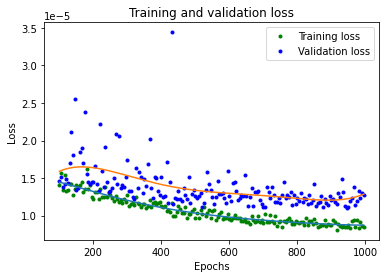

In [ ]:
show_history(history_relu)

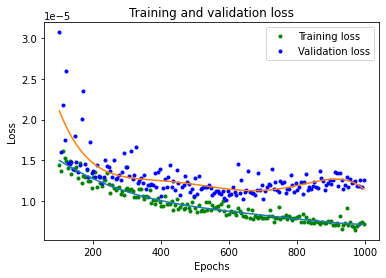

In [ ]:
show_history(history_2)

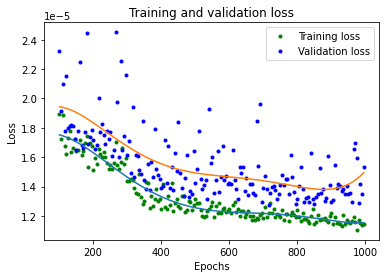

In [ ]:
show_history(history_3)

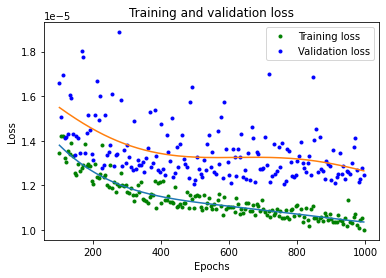

In [ ]:
show_history(history_4)

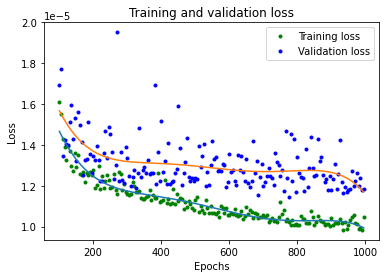

In [ ]:
show_history(history_5)

## Тестирование обученной сети

Применим новые данные, на которых сеть не обучалась. 

При этом не забудем про подготовку входных и выходных параметров. 

In [ ]:
def process_data(df):
  # Replace zeros
  df.loc[df["Id"] < 0, "Id"] = 0
  df["Id"].replace({0:REPLACE_ZERO_ID}, inplace=True)
  df["Vgs"].replace({0:REPLACE_ZERO_VGS}, inplace=True)
  df["Vds"].replace({0:REPLACE_ZERO_VDS}, inplace=True)

  # fix negative numbers
  df["T"] += SHIFT_T

  # get data

  id=df["Id"]
  Vgs=df["Vgs"]
  Vds=df["Vds"]
  L=df["L"]
  W=df["W"]
  T=df["T"]

  ynew=np.ravel(id)
  xnew=df.iloc[:,0:5]

  # xval = xnew
  # yval = ynew

  #Normalize validation data
  xval=np.log10(xnew)
  yval=-1/np.log10(ynew)
  yval=yval.reshape(-1,1)

  return xval, yval, df

In [ ]:
df1 = pd.read_csv('mosfet_val_3.csv')

In [ ]:
# df1 = df1[df1['Vgs'] == 1]
df1

,Vds,Vgs,L,W,T,Id
0,0.0,0.1,2.000000e-07,2.000000e-07,25.0,1.416814e-27
1,0.1,0.1,2.000000e-07,2.000000e-07,25.0,9.029534e-12
2,0.2,0.1,2.000000e-07,2.000000e-07,25.0,1.029902e-11
3,0.3,0.1,2.000000e-07,2.000000e-07,25.0,1.146130e-11
4,0.4,0.1,2.000000e-07,2.000000e-07,25.0,1.265098e-11
...,...,...,...,...,...,...
56,5.6,0.1,2.000000e-07,2.000000e-07,25.0,3.568931e-10
57,5.7,0.1,2.000000e-07,2.000000e-07,25.0,3.769632e-10
58,5.8,0.1,2.000000e-07,2.000000e-07,25.0,3.981087e-10
59,5.9,0.1,2.000000e-07,2.000000e-07,25.0,4.203854e-10


In [ ]:
xval, yval, df1 = process_data(df1)

**Plot actual vs. predicted result. Make sure that predicted drain current is de-normalized before plotting.**

*De-normalization required because before feeding to network (training phase), we have converted drain current within 0 to 1 range  so that Sigmoid function can operate. So, predicted current value will be within same range. It should be converted back to it's original form (De-normalization)*

In [ ]:
def show_val(xval, yval, df):
  vg1=df["Vds"] #change this index to vgs if you are going to plot Id-Vg
  vg=np.ravel(vg1)
  vg=vg.reshape(-1,1)
  plt.plot(vg, 10**(-1/yval), 'ro', label='Actual')

  plt.title('Actual and Predicted Value')
  plt.xlabel('Drain Voltage (Vds)')
  plt.ylabel('Drain Current(Id)')
  plt.legend()

In [ ]:
def show_pred(model, xval, df, name=''):
  # Predict the new dataset
  y_pred = model.predict(xval)
  #plot the result
  vg1=df["Vds"] #change this index to vgs if you are going to plot Id-Vg
  vg=np.ravel(vg1)
  vg=vg.reshape(-1,1)

  plt.plot(vg, 10**(-1/y_pred), label='Predicted ' + name)

  # plt.plot(vg, yval, 'ro', label='Actual')
  # plt.plot(vg, y_pred, 'b', label='Predicted')

  # plt.yscale("log")

Вспомним что область обучения лежала в пределах 0 до 5 для напржений

In [ ]:
df1 = pd.read_csv('mosfet_val_3.csv')
xval, yval, df1 = process_data(df1)

2/2 [==============================] - 0s 5ms/step


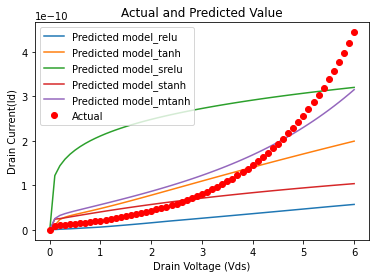

In [ ]:
show_pred(model_relu, xval, df1, 'model_relu')
show_pred(model_tanh, xval, df1, 'model_tanh')
show_pred(model_srelu, xval, df1, 'model_srelu')
show_pred(model_stanh, xval, df1, 'model_stanh')
show_pred(model_mtanh, xval, df1, 'model_mtanh')
show_val(xval, yval, df1)

2/2 [==============================] - 0s 4ms/step


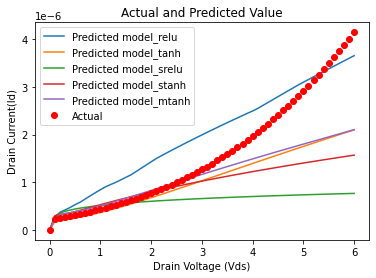

In [ ]:
df1 = pd.read_csv('mosfet_val_4.csv')
xval, yval, df1 = process_data(df1)
show_pred(model_relu, xval, df1, 'model_relu')
show_pred(model_tanh, xval, df1, 'model_tanh')
show_pred(model_srelu, xval, df1, 'model_srelu')
show_pred(model_stanh, xval, df1, 'model_stanh')
show_pred(model_mtanh, xval, df1, 'model_mtanh')
show_val(xval, yval, df1)

2/2 [==============================] - 0s 7ms/step


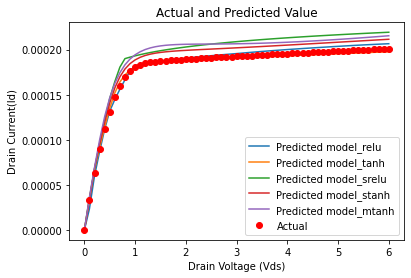

In [ ]:
df1 = pd.read_csv('mosfet_val_5.csv')
xval, yval, df1 = process_data(df1)
show_pred(model_relu, xval, df1, 'model_relu')
show_pred(model_tanh, xval, df1, 'model_tanh')
show_pred(model_srelu, xval, df1, 'model_srelu')
show_pred(model_stanh, xval, df1, 'model_stanh')
show_pred(model_mtanh, xval, df1, 'model_mtanh')
show_val(xval, yval, df1)

2/2 [==============================] - 0s 5ms/step


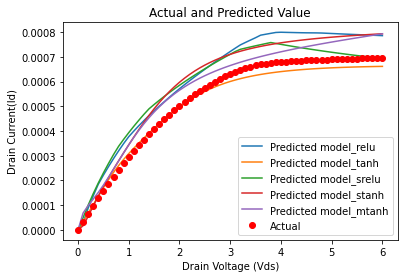

In [ ]:
df1 = pd.read_csv('mosfet_val_6.csv')
xval, yval, df1 = process_data(df1)
show_pred(model_relu, xval, df1, 'model_relu')
show_pred(model_tanh, xval, df1, 'model_tanh')
show_pred(model_srelu, xval, df1, 'model_srelu')
show_pred(model_stanh, xval, df1, 'model_stanh')
show_pred(model_mtanh, xval, df1, 'model_mtanh')
show_val(xval, yval, df1)

3/3 [==============================] - 0s 3ms/step


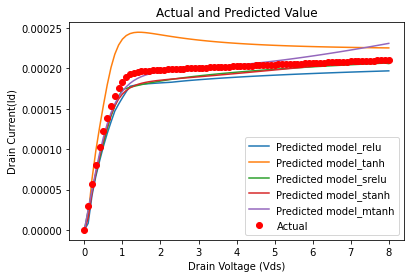

In [ ]:
df1 = pd.read_csv('mosfet_val_7.csv')
xval, yval, df1 = process_data(df1)
show_pred(model_relu, xval, df1, 'model_relu')
show_pred(model_tanh, xval, df1, 'model_tanh')
show_pred(model_srelu, xval, df1, 'model_srelu')
show_pred(model_stanh, xval, df1, 'model_stanh')
show_pred(model_mtanh, xval, df1, 'model_mtanh')
show_val(xval, yval, df1)

Посчитаем MSE для валиадционных данных внутри области обчения

In [ ]:
df_val = pd.read_csv('mosfet_val_0.csv')

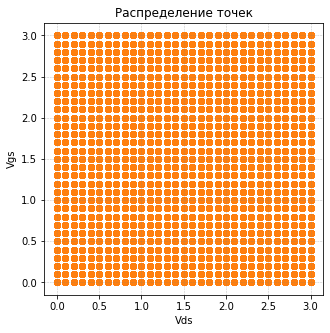

In [ ]:
x = df[df['T'] == df.iloc[0]['T']]['Vds']
y = df[df['T'] == df.iloc[0]['T']]['Vgs']

x_val = df_val[df_val['T'] == df_val.iloc[0]['T']]['Vds']
y_val = df_val[df_val['T'] == df_val.iloc[0]['T']]['Vgs']

fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlabel='Vds', ylabel='Vgs', title='Распределение точек')
ax.grid(color='gray', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.scatter(x, y)
plt.scatter(x_val, y_val)
plt.show()

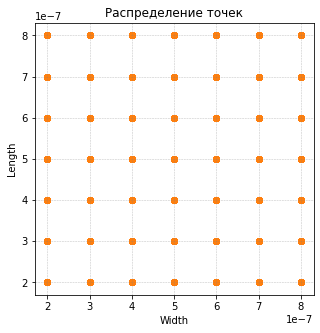

In [ ]:
x = df[df['T'] == df.iloc[0]['T']]['W']
y = df[df['T'] == df.iloc[0]['T']]['L']

x_val = df_val[df_val['T'] == df_val.iloc[0]['T']]['W']
y_val = df_val[df_val['T'] == df_val.iloc[0]['T']]['L']

fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlabel='Width', ylabel='Length', title='Распределение точек')
ax.grid(color='gray', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.scatter(x, y)
plt.scatter(x_val, y_val)
plt.show()

In [ ]:
def print_loss(df_val, model):
  xval, yval, df_val = process_data(df_val)
  y_pred = model_relu.predict(xval)
  loss_postproc = keras.losses.MSE(10**(-1/yval), 10**(-1/y_pred))
  loss = keras.losses.MSE(yval, y_pred)
  print('max loss: ', np.max(loss))
  print('max post-proc loss: ', np.max(loss_postproc))
  loss_mean = tf.reduce_mean(loss_postproc) # Рассчитать среднеквадратичную ошибку партии
  print('mean post-prox loss: ', loss_mean)

In [ ]:
print_loss(df_val, model_relu)

14716/14716 [==============================] - 32s 2ms/step
max loss:  0.0013038516
max post-proc loss:  9.769596e-09
mean post-prox loss:  tf.Tensor(4.2312298e-10, shape=(), dtype=float32)


In [ ]:
print_loss(df_val, model_tanh)

14716/14716 [==============================] - 33s 2ms/step
max loss:  0.001361964
max post-proc loss:  1.7015108e-08
mean post-prox loss:  tf.Tensor(8.278366e-10, shape=(), dtype=float32)


In [ ]:
print_loss(df_val, model_srelu)

14716/14716 [==============================] - 21s 1ms/step
max loss:  0.001631434
max post-proc loss:  2.6701223e-08
mean post-prox loss:  tf.Tensor(1.2811989e-09, shape=(), dtype=float32)


In [ ]:
print_loss(df_val, model_stanh)

14716/14716 [==============================] - 21s 1ms/step
max loss:  0.0019111276
max post-proc loss:  3.5038205e-08
mean post-prox loss:  tf.Tensor(1.7254507e-09, shape=(), dtype=float32)


In [ ]:
print_loss(df_val, model_mtanh)

14716/14716 [==============================] - 21s 1ms/step
max loss:  0.002156865
max post-proc loss:  4.4522636e-08
mean post-prox loss:  tf.Tensor(2.139669e-09, shape=(), dtype=float32)


- Для tanh: 

2.5872064e-09 0.0017965034
tf.Tensor(3.1664536e-11, shape=(), dtype=float32)


Посчитаем MSE на данных, которые находятся вне области обучения



In [ ]:
df_val_out = pd.read_csv('mosfet_val_1.csv')

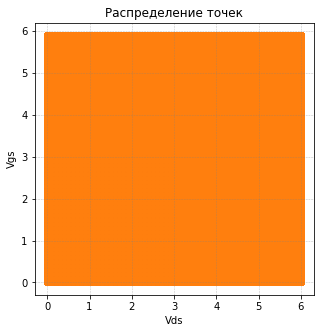

In [ ]:
x = df[df['T'] == df.iloc[0]['T']]['Vds']
y = df[df['T'] == df.iloc[0]['T']]['Vgs']

x_val = df_val_out[df_val_out['T'] == df_val_out.iloc[0]['T']]['Vds']
y_val = df_val_out[df_val_out['T'] == df_val_out.iloc[0]['T']]['Vgs']

fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlabel='Vds', ylabel='Vgs', title='Распределение точек')
ax.grid(color='gray', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.scatter(x, y)
plt.scatter(x_val, y_val)
plt.show()

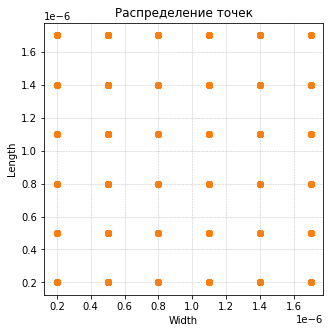

In [ ]:
x = df[df['T'] == df.iloc[0]['T']]['W']
y = df[df['T'] == df.iloc[0]['T']]['L']

x_val = df_val_out[df_val_out['T'] == df_val_out.iloc[0]['T']]['W']
y_val = df_val_out[df_val_out['T'] == df_val_out.iloc[0]['T']]['L']

fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlabel='Width', ylabel='Length', title='Распределение точек')
ax.grid(color='gray', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.scatter(x, y)
plt.scatter(x_val, y_val)
plt.show()

In [ ]:
xval, yval, df_val = process_data(df_val_out)
y_pred = model.predict(xval)
loss = keras.losses.MSE(10**(-1/yval), 10**(-1/y_pred))
l = keras.losses.MSE(yval, y_pred)
print(np.max(loss), np.max(l))
loss = tf.reduce_mean(loss) # Рассчитать среднеквадратичную ошибку партии
print(loss)

4118/4118 [==============================] - 6s 1ms/step
1.1632262e-05 0.1036522
tf.Tensor(2.8810073e-06, shape=(), dtype=float32)


In [ ]:
print_loss(df_val_out, model_relu)

4118/4118 [==============================] - 6s 2ms/step
max loss:  0.0042757224
max post-proc loss:  4.982407e-06
mean post-prox loss:  tf.Tensor(6.156452e-08, shape=(), dtype=float32)


In [ ]:
print_loss(df_val_out, model_tanh)

4118/4118 [==============================] - 10s 3ms/step
max loss:  0.0042648125
max post-proc loss:  4.9740806e-06
mean post-prox loss:  tf.Tensor(6.194699e-08, shape=(), dtype=float32)


In [ ]:
print_loss(df_val_out, model_srelu)

4118/4118 [==============================] - 10s 2ms/step
max loss:  0.0042559304
max post-proc loss:  4.967293e-06
mean post-prox loss:  tf.Tensor(6.357015e-08, shape=(), dtype=float32)


In [ ]:
print_loss(df_val_out, model_stanh)

4118/4118 [==============================] - 6s 1ms/step
max loss:  0.004160908
max post-proc loss:  4.894093e-06
mean post-prox loss:  tf.Tensor(6.503205e-08, shape=(), dtype=float32)


In [ ]:
print_loss(df_val_out, model_mtanh)

4118/4118 [==============================] - 6s 1ms/step
max loss:  0.0040547466
max post-proc loss:  4.8110705e-06
mean post-prox loss:  tf.Tensor(6.581093e-08, shape=(), dtype=float32)


- для tanh:

0.0077557433 0.84016144
tf.Tensor(0.0006414045, shape=(), dtype=float32)

In [ ]:
df1 = df_val_out.iloc[-64:-32]

1/1 [==============================] - 0s 16ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


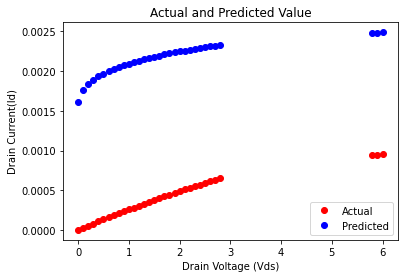

In [ ]:
xval, yval, df_val = process_data(df1)
show_plot(xval, yval, df1)

In [ ]:
def show_plot(xval, yval, df):
  # Predict the new dataset
  y_pred = model.predict(xval)
  # y_pred_16_8_4 = model.predict(xval)
  #plot the result
  vg1=df["Vds"] #change this index to vgs if you are going to plot Id-Vg
  vg=np.ravel(vg1)
  vg=vg.reshape(-1,1)
  # print(vg)
  plt.plot(vg, 10**(-1/yval), 'ro', label='Actual')
  plt.plot(vg, 10**(-1/y_pred), 'bo', label='Predicted')
  # plt.plot(vg, 10**(-1/y_pred_16_8_4), 'g', label='Predicted')
  # plt.yscale("log")
  plt.title('Actual and Predicted Value')
  plt.xlabel('Drain Voltage (Vds)')
  plt.ylabel('Drain Current(Id)')
  plt.legend()

*The code presented here is a part of our model development framework. Hope, it will encourage others to develop MOSFET models based upon Neural network.*